In [126]:
#В качестве датасета выбран набор данных о винах: https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset

# Загружаем библиотеки
import numpy as np # работа с векторами
import matplotlib.pyplot as plt # рисовать графики
import pandas as pd # для работы с табличная
import sklearn # машинное обучение на python
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import statsmodels.api as sm

## Home Assignment 1. Data processing

In [63]:
# Обработка данных
dataset = pd.read_csv('ElectricCarData_Clean.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_name       103 non-null    object 
 1   Model_name       103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [64]:
#удалим некоторые столбцы из-за большого количества пропусков в данных.
dataset = dataset.drop(columns = ['FastCharge_KmH', 'RapidCharge', 'PlugType', 'Segment'])

In [65]:
dataset.head(15)

,Brand_name,Model_name,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PowerTrain,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,AWD,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,RWD,Hatchback,5,30000
2,Polestar,2,4.7,210,400,181,AWD,Liftback,5,56440
3,BMW,iX3,6.8,180,360,206,RWD,SUV,5,68040
4,Honda,e,9.5,145,170,168,RWD,Hatchback,4,32997
5,Lucid,Air,2.8,250,610,180,AWD,Sedan,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,FWD,Hatchback,5,31900
7,Peugeot,e-208,8.1,150,275,164,FWD,Hatchback,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,RWD,Sedan,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,AWD,SUV,5,55000


In [66]:
#такие поля как Brand_name, Model_name, PowerTrain, BodyStyle имеют категориальный вид и с ними будет сложно работать. 
#Нужно их категоризовать

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

dataset['brand'] = label_encoder.fit_transform(dataset['Brand_name'])
dataset['model'] = label_encoder.fit_transform(dataset['Model_name'])
dataset['power_type'] = label_encoder.fit_transform(dataset['PowerTrain'])

# а столбец BodyStyle, мы разделим следующим образом для удобства обработки данных
def categorize_body_style(style):
    if style == "SUV":
        return 1
    elif style == "Sedan":
        return 2
    else:
        return 0

dataset['body_type'] = dataset['BodyStyle'].apply(categorize_body_style)

#удалим старые поля Brand_name, Model_name, PowerTrain, BodyStyle
dataset = dataset.drop(columns = ['Brand_name','Model_name', 'PowerTrain', 'BodyStyle'])

#переименуем остальные столбцы в человеческий вид
new_column_names = {
    'AccelSec': 'acceleration',
    'TopSpeed_KmH': 'max_speed',
    'Range_Km': 'power_reserve',
    'Efficiency_WhKm': 'efficiency',
    'Seats': 'seats',
    'PriceEuro': 'price'
}
dataset.rename(columns=new_column_names, inplace=True)

In [67]:
dataset.head(15)

,acceleration,max_speed,power_reserve,efficiency,seats,price,brand,model,power_type,body_type
0,4.6,233,450,161,5,55480,30,46,0,2
1,10.0,160,270,167,5,30000,31,33,2,0
2,4.7,210,400,181,5,56440,23,0,0,0
3,6.8,180,360,206,5,68040,2,101,2,1
4,9.5,145,170,168,4,32997,9,78,2,0
5,2.8,250,610,180,5,105000,15,4,0,2
6,9.6,150,190,168,5,31900,31,83,1,0
7,8.1,150,275,164,5,29682,22,81,1,0
8,5.6,225,310,153,5,46380,30,48,2,2
9,6.3,180,400,193,5,55000,1,62,0,1


In [68]:
#Чтобы не допустить сильных разбросов при анализе, сделаем нормализацию данных

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
dataset = pd.DataFrame(scaled_data, columns=dataset.columns)

In [69]:
dataset.head()

,acceleration,max_speed,power_reserve,efficiency,seats,price,brand,model,power_type,body_type
0,0.123153,0.383275,0.405714,0.337278,0.6,0.181407,0.93750,0.455446,0.0,1.0
1,0.389163,0.128920,0.200000,0.372781,0.6,0.050654,0.96875,0.326733,1.0,0.0
2,0.128079,0.303136,0.348571,0.455621,0.6,0.186334,0.71875,0.000000,0.0,0.0
3,0.231527,0.198606,0.302857,0.603550,0.6,0.245860,0.06250,1.000000,1.0,0.5
4,0.364532,0.076655,0.085714,0.378698,0.4,0.066033,0.28125,0.772277,1.0,0.0


## Home Assignment 2. Correlation Coefficient

### 2.1 Find two features in your dataset with more or less “linear-like” scatterplot.

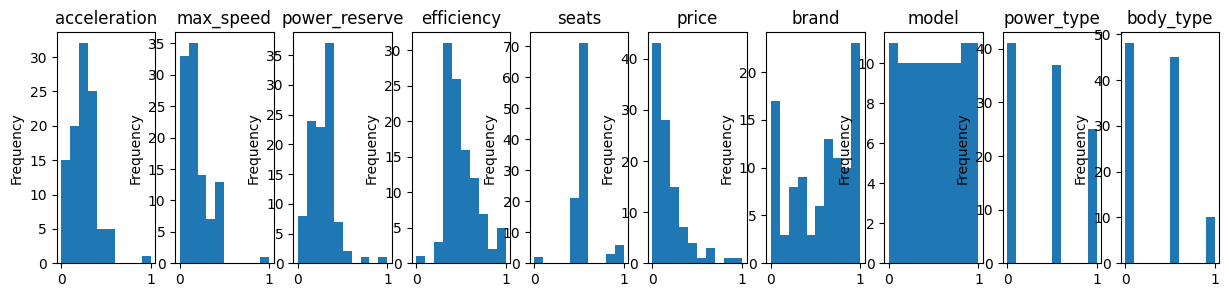

In [72]:
# Create a linear view of plots in a single row
fig, axes = plt.subplots(1, len(dataset.columns), figsize=(15, 3))  # Adjust the 'figsize' as needed

# Loop through each column and create a plot
for i, column in enumerate(dataset.columns):
    dataset[column].plot(kind='hist', ax=axes[i])  # Adjust 'kind' as needed
    axes[i].set_title(column)

plt.show()  # Display the linear view of plots

#### Как видно на графиках более-менее линейный вид имеют acceleration, efficiency, max_speed и price.
### 2.2 Display the scatter-plot and comment how well it is suitable for building a linear regression.
#### Чтобы выбрать лучшие два параметра, которые хорошо линейно связаны, построим комбинацию из всех 4 значений

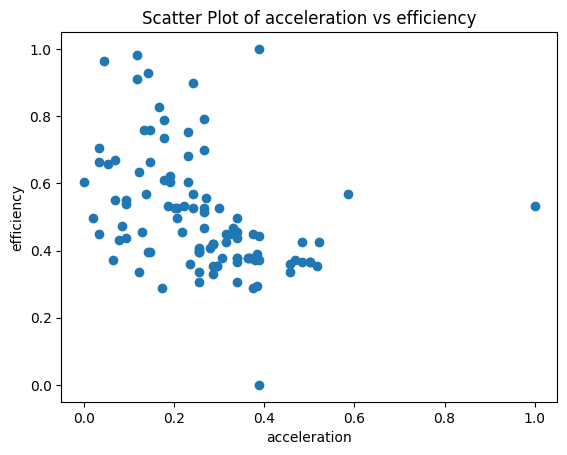

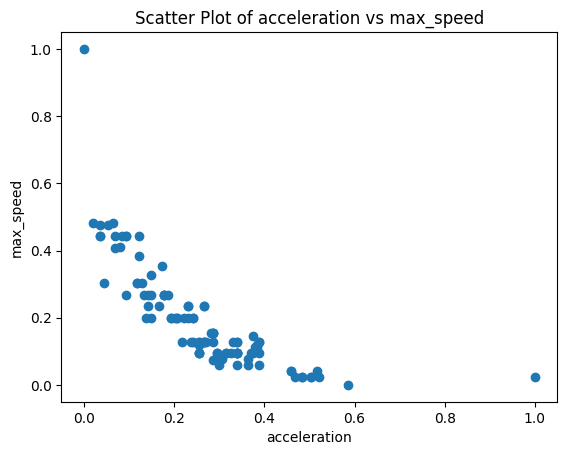

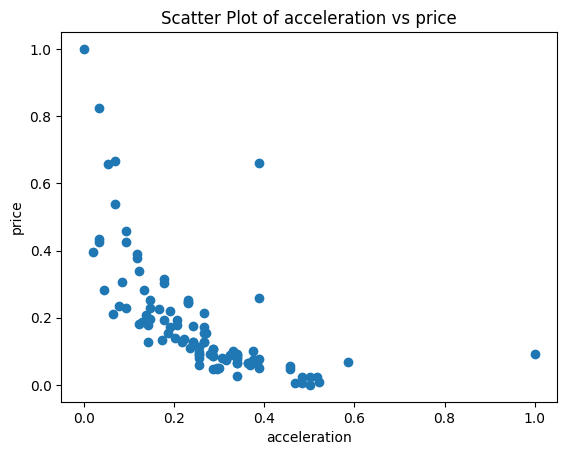

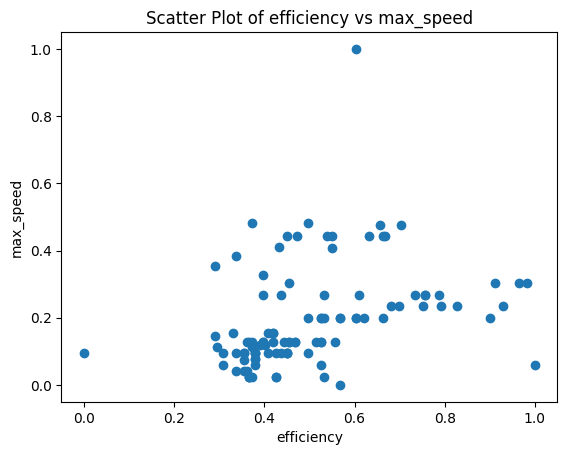

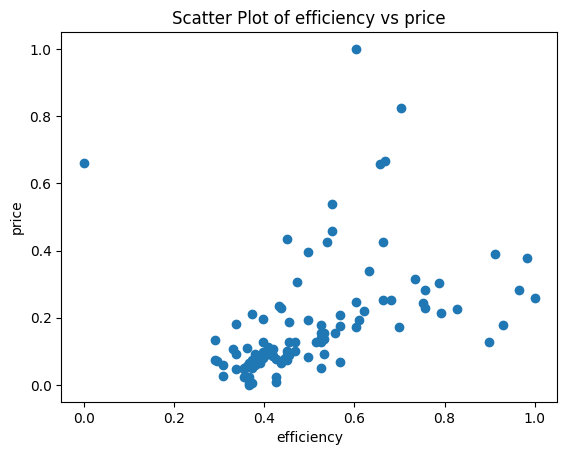

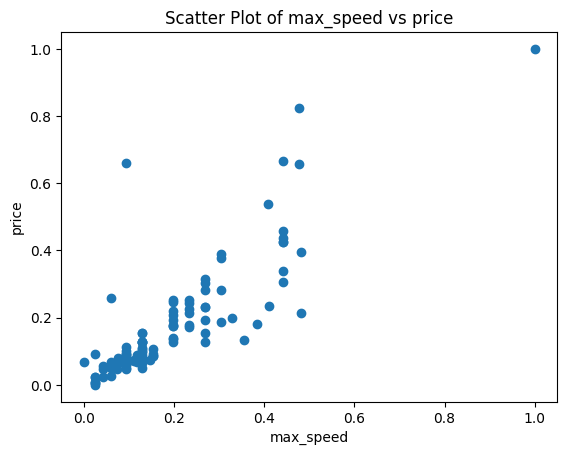

In [84]:
#Теперь разберем насколько они хорошо подойдут для постройки линейной регрессии. Построим для них график

parameters = ['acceleration', 'efficiency', 'max_speed', 'price']

for i in range(len(parameters)):
    for j in range(i + 1, len(parameters)):
        x = dataset[parameters[i]]
        y = dataset[parameters[j]]

        plt.scatter(x, y)
        plt.xlabel(parameters[i])
        plt.ylabel(parameters[j])
        plt.title(f'Scatter Plot of {parameters[i]} vs {parameters[j]}')
        plt.show()


#### 2.2 Overall
По результатам графиков можно сказать, что пара (acceleration и max_speed) и (acceleration и price) нам не подойдут, так как их графики больше похожи на экспоненциальную зависимость, чем на линейную. Пара (acceleration и efficiency), так как точки сильно разбросаны по плоскости, то теоретически через данные точки можно провести прямую, но тогда расстояние других(отдаленных) от этой прямой точек будет сильно разбросано на плоскости. Из всех графиков, лучше всего подойдут пара (efficiency и price) и (max_speed и price). Через их точки достаточно легко провести прямую. Да и не стоит забывать о логике вещей об электрокаров: чем эффективную машину ты хочешь, тем больше тебе придется заплатить. То же самое касается и цены(последний график). Как итог выбор останется над параметрами (efficiency и price)

### 2.3 Build a linear regression of one of the features over the other. Make a comment on the meaning of the slope.

In [114]:
# Выделим признаки и целевую переменную
X = dataset[['efficiency']]
y = dataset['price']

# Разделим данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

# Делаем прогноз на тестовом наборе
y_pred = model.predict(X_test)

#Значение коэффициента наклона
slope = model.coef_[0]
print(slope)

0.41663364172021256


Значение наклона (slope) в контексте линейной регрессии представляет собой коэффициент, который показывает, насколько изменяется зависимая переменная (ваша целевая переменная) при изменении независимой переменной (признака) на одну единицу. В нашем случае, значение наклона 0.41663364172021256 означает, что при увеличении значения признака `'efficiency'` на одну единицу, ожидается, что ваша целевая переменная (в данном случае, `'price'`) увеличится на примерно 0.4166 единиц.

Это позволяет нам понять, как изменения в признаке `'efficiency'` влияют на нашу целевую переменную `'price'`. Если значение наклона положительное, как в нашем случае, это означает, что увеличение `'efficiency'` сопровождается увеличением `'price'`. В случае отрицательного значения наклона, увеличение `'efficiency'` будет связано с уменьшением `'price'`.


### 2.4  Find the correlation and determinacy coefficients, and comment on the meaning of the latter.

In [115]:
#Коэффициент корреляции позволяет оценить силу и направление связи между двумя переменными

correlation = np.corrcoef(X, y, rowvar=False)[0, 1]

#Детерминированность (R^2) измеряет объясненную дисперсию в зависимой переменной моделью регрессии
r2 = r2_score(y_test, y_pred)

print("Correlation", correlation)
print("r2", r2)

Correlation 0.39670495053481675
r2 0.22572729506391365


Как видно из результатов выше, значение r^2  = 0.22. Тем ближе значение детерминированности к 1, тем лучше модель объясняет вариацию в данных. Если R-квадрат близок к 0, это может указывать на то, что модель плохо подходит для данных, и возможно, потребуется рассмотреть альтернативные модели. Попробуем выбрать другие вариации параметров, чтобы получить значение детерминированности близкое к 1.

In [117]:
# Выделим признаки и целевую переменную
X = dataset[['max_speed']]
y = dataset['price']

# Разделим данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Создаем модель линейной регрессии
model_2 = LinearRegression()

# Обучаем модель на обучающей выборке
model_2.fit(X_train, y_train)

# Делаем прогноз на тестовом наборе
y_pred = model_2.predict(X_test)

correlation = np.corrcoef(X, y, rowvar=False)[0, 1]
r2 = r2_score(y_test, y_pred)
print("Correlation", correlation)
print("r2", r2)

Correlation 0.8290567655142332
r2 0.7008529980883553


В коде выше, мы попробовали изменить нецелевой признак нашей модели с `'efficiency'` на `'max_speed'`. И получили следующие значения корреляции и детерминированности: `Correlation = 0.8290567655142332` и `r2 = 0.7008529980883553`. По сравнению, когда нецелевым признаком у нас была `'efficiency'`, значение детерминированности увеличилось с `0.22` на `0.7`, что говорит о том, что `70%` дисперсии в данных объясняется моделью, что может считаться хорошим результатом во многих случаях. А вот значение корреляции не изменилось, при смене нецелевых признаком и осталось на уровне `0.83`

### 2.5  Make a prediction of the target values for given two or three predictor’ values; make a comment

In [159]:
X1 = 0.2  # Значение первого предиктора
X2 = 0.3  # Значение второго предиктора
X3 = 0.4  # Значение третьего предиктора

X1_pred = pd.DataFrame({'max_speed': [X1]})
X2_pred = pd.DataFrame({'max_speed': [X2]})
X3_pred = pd.DataFrame({'max_speed': [X3]})

#прогноз
y1_pred = model_2.predict(X1_pred)
y2_pred = model_2.predict(X2_pred)
y3_pred = model_2.predict(X3_pred)

print("Прогноз 1ой целевой переменной:", y1_pred, "Прогноз 2ой целевой переменной:", y2_pred, "Прогноз 3ей целевой переменной:", y3_pred)

mse = mean_squared_error(y_test, y_pred)

Прогноз 1ой целевой переменной: [0.18947943] Прогноз 2ой целевой переменной: [0.28466826] Прогноз 3ей целевой переменной: [0.37985708]


Значение прогноза первого целего признака составила `0.19`, второго `0.28`, третьего `0.38`. По этим 2 значениям очень сложно сделать  какой либо вывод. Но чтобы понять насколько модель эффективна, было вычислено значение MSE (Mean Squared Error), которое состовило `0.006247180173971255`. Данный параметр представляет собой меру квадратичной ошибки между прогнозами вашей модели и фактическими данными на тестовом наборе.

Чем ближе значение MSE к нулю, тем лучше модель способна делать прогнозы. В нашем случае, значение MSE довольно низкое, что говорит о том, что ваши прогнозы близки к фактическим данным. Это обычно считается хорошим результатом.

### 2.6 Compare the mean relative absolute error of the regression on all points of your set according to DA and ML

In [182]:
#Создадим модель для предикта на основе Data Analysis
# Sample data
X = dataset[['max_speed']]
y = dataset['price']

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Fit a simple linear regression model
da_model = sm.OLS(y, X).fit()

# Make predictions
new_data = sm.add_constant([0.2, 0.3, 0.4])  # New data points to predict
predictions_da = da_model.predict(new_data)

actual_values_da = np.array([0.186545, 0.309596, 0.538156])

# Calculate the absolute error and relative absolute error for DA
absolute_error_da = np.abs(actual_values_da - predictions_da)
relative_absolute_error_da = absolute_error_da / np.abs(actual_values_da)

# Calculate MRAE for DA
mrae_da = np.mean(relative_absolute_error_da)

# Calculate r^2 for DA
r2_da = r2_score(actual_values_da, predictions_da)


In [183]:
# Assuming you have ML predictions
predictions_ml = np.array([0.18947943, 0.28466826, 0.37985708])

# Calculate the absolute error and relative absolute error for ML
absolute_error_ml = np.abs(actual_values_da - predictions_ml)
relative_absolute_error_ml = absolute_error_ml / np.abs(actual_values_da)

# Calculate MRAE for ML
mrae_ml = np.mean(relative_absolute_error_ml)
r2_ml = r2_score(y_test, y_pred)

In [186]:
# Compare MRAE for DA and ML
if mrae_da < mrae_ml:
    print("DA has a lower MRAE, indicating better performance.")
else:
    print("ML has a lower MRAE, indicating better performance.")

# Compare MRAE for DA and ML
if r2_da > r2_ml:
    print("DA has a heigher r2, indicating better performance.")
else:
    print("ML has a heigher r2, indicating better performance.")

DA has a lower MRAE, indicating better performance.
ML has a heigher r2, indicating better performance.


### 2.7 Compare the errors and the determinacy coefficient

Интерпретация результатов

1. `mrae_da < mrae_ml` - Это указывает на то, что для `MRAE для DA` показывает лучшую производительность. Очень низкое значение MRAE в DA говорит о том, что прогнозы, полученные с использованием методов анализа данных, близки к фактическим данным и, следовательно, они считаются более точными.

2. `r2_ml > r2_da` - Это сообщение указывает на то, что для коэффициента детерминации `R^2 для ML` показывает лучшую производительность. Более высокое значение `R^2` в ML означает, что модель лучше объясняет изменчивость зависимой переменной на основе предикторов.

Итак, в зависимости от того, какой показатель вы считаете мы посчитаем более важным для нашей задачи, можно сделать разные выводы:

- Если более важна точность прогнозов, то `DA` показывает лучшую производительность, так как имеет более низкое `MRAE`.

- Если более важно объяснение вариабельности в данных, то `ML` показывает лучшую производительность, так как имеет более высокий коэффициент детерминации `R^2`.